In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd 

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
#Read csv file into a dataframe
import io 
data_df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
data_df.head()

,Email No.,Prediction,the,to,ect,and,for,of,a,you,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,Email 1,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,0,8,13,24,6,6,2,102,1,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,0,0,1,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,0,5,22,0,5,1,51,2,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,0,7,6,17,1,5,2,57,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_df.nunique()

Email No.         5172
Prediction           2
the                 90
to                  72
ect                 90
                  ... 
infrastructure       4
military             4
allowing             3
ff                  23
dry                  4
Length: 3002, dtype: int64

In [ ]:
#Look at the sums for each column (i.e. the number of times the word appears in emails) 
sum_df = data_df.drop(columns=['Email No.'])
sum_df = sum_df.sum().sort_values(ascending=False)
sum_df

e            438561
t            312791
a            287136
o            284970
n            248777
              ...  
padre            21
felipe           21
dorcheus         21
pooling          21
decisions        21
Length: 3001, dtype: int64

In [3]:
#Find all the columns whos sum is less than 50 (i.e. the word appears less than 50 times)
low_cols = [col for col in data_df.columns[1:] if data_df[col].sum() <= 50]
low_cols

['talked',
 'behalf',
 'hplnol',
 'somehow',
 'highly',
 'titles',
 'ftar',
 'nominates',
 'centana',
 'kinsey',
 'goals',
 'acceptance',
 'josey',
 'rather',
 'egmnom',
 'lowest',
 'talking',
 'understood',
 'logos',
 'notified',
 'connor',
 'fontfont',
 'almost',
 'crude',
 'clearance',
 'ftworth',
 'resellers',
 'counterparties',
 'cartwheel',
 'mtbe',
 'split',
 'submitted',
 'baseload',
 'rights',
 'lost',
 'membership',
 'invitation',
 'legislation',
 'guadalupe',
 'zivley',
 'pipelines',
 'equity',
 'dealers',
 'claims',
 'merchant',
 'braband',
 'topica',
 'edmondson',
 'participate',
 'throughout',
 'checked',
 'contents',
 'investments',
 'moving',
 'proposed',
 'deer',
 'enquiries',
 'reduction',
 'evening',
 'concerning',
 'cowboy',
 'minimum',
 'changing',
 'built',
 'strategy',
 'thousands',
 'resulting',
 'policy',
 'positive',
 'quantity',
 'programs',
 'airmail',
 'prepared',
 'austin',
 'uae',
 'jaquet',
 'hplr',
 'weather',
 'terminated',
 'venturatos',
 'cellpadding

In [4]:
#Count how many columns had sums less than 50.
low_count = len(low_cols)
low_count

815

In [5]:
#Drop the low count columns from the df (3002 original columns - 815 dropped = 2187 columns)
new_df = data_df.copy()
for col in new_df.columns:
    if col in low_cols:
        del new_df[col]
new_df.head()

,Email No.,Prediction,the,to,ect,and,for,of,a,you,...,del,trial,ended,fall,hate,plain,jay,valued,lay,ff
0,Email 1,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,0,8,13,24,6,6,2,102,1,...,0,0,0,0,0,0,0,0,0,1
2,Email 3,0,0,0,1,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,0,5,22,0,5,1,51,2,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,0,7,6,17,1,5,2,57,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
model_df = new_df.drop(columns=['Email No.'])
model_df

,Prediction,the,to,ect,and,for,of,a,you,hou,...,del,trial,ended,fall,hate,plain,jay,valued,lay,ff
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,0,0,1
5169,1,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,1,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
model_df = pd.get_dummies(model_df, dtype=float)
model_df.head()

,Prediction,the,to,ect,and,for,of,a,you,hou,...,del,trial,ended,fall,hate,plain,jay,valued,lay,ff
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Split our preprocessed data into our features and target arrays
y = model_df['Prediction'].values
X = model_df.drop('Prediction', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Opt Model A

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1=1000
hidden_nodes_layer2=2000
hidden_nodes_layer3 =3000
hidden_nodes_layer4 =4000
nnopt_a = tf.keras.models.Sequential()

# First hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnopt_a.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nnopt_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              2186000   
                                                                 
 dense_8 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_9 (Dense)             (None, 3000)              6003000   
                                                                 
 dense_10 (Dense)            (None, 4000)              12004000  
                                                                 
 dense_11 (Dense)            (None, 1)                 4001      
                                                                 
Total params: 22,199,001
Trainable params: 22,199,001
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nnopt_a.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model
fit_model = nnopt_a.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
122/122 [==============================] - 48s 393ms/step - loss: 0.0630 - accuracy: 0.9786
Epoch 2/20
122/122 [==============================] - 47s 387ms/step - loss: 0.0189 - accuracy: 0.9925
Epoch 3/20
122/122 [==============================] - 46s 377ms/step - loss: 0.0632 - accuracy: 0.9907
Epoch 4/20
122/122 [==============================] - 47s 381ms/step - loss: 0.0418 - accuracy: 0.9884
Epoch 5/20
122/122 [==============================] - 47s 383ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 6/20
122/122 [==============================] - 46s 374ms/step - loss: 0.0222 - accuracy: 0.9941
Epoch 7/20
122/122 [==============================] - 47s 389ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 8/20
122/122 [==============================] - 47s 388ms/step - loss: 0.0276 - accuracy: 0.9920
Epoch 9/20
122/122 [==============================] - 47s 386ms/step - loss: 0.0316 - accuracy: 0.9928
Epoch 10/20
122/122 [==============================] - 48s 392ms/step - l

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nnopt_a.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

41/41 - 2s - loss: 2.3434 - accuracy: 0.9737 - 2s/epoch - 52ms/step
Loss: 2.3433609008789062, Accuracy: 0.9737045764923096


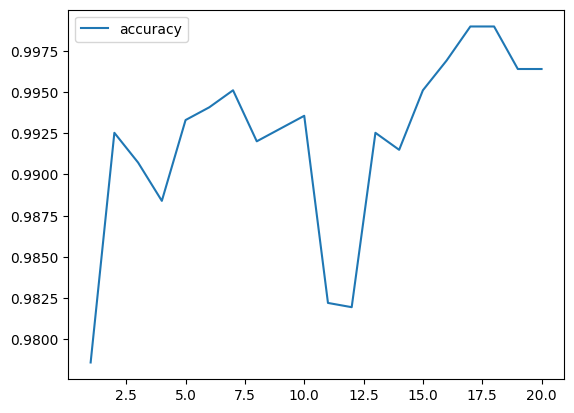

In [22]:
#### Create a DataFrame containing training history
opta_history_df = pd.DataFrame(fit_model.history)
opta_history_df.index += 1

#### Plot the accuracy
opta_accuracy = opta_history_df.plot(y="accuracy")

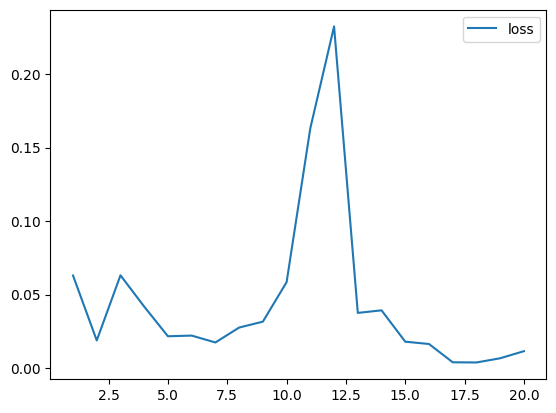

In [24]:
#### Plot the loss
opta_loss = opta_history_df.plot(y="loss")